In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [11]:
df_FitBit = pd.read_parquet('fitbitSleepStages.parquet.gzip', engine='pyarrow')

In [39]:
df_FitBit.dtypes

timestamp       datetime64[ns, UTC]
stage                       float64
endTimestamp    datetime64[ns, UTC]
x               datetime64[ns, UTC]
y                           float64
dtype: object

In [24]:
df_FitBit.columns

Index(['timestamp', 'stage', 'endTimestamp'], dtype='object')

In [29]:
df_FitBit.head()

,timestamp,stage,endTimestamp,x,y
index,,,,,
2020-07-11 09:13:00+00:00,2020-07-11 09:13:00+00:00,1.0,2020-07-11 09:15:00+00:00,2020-07-11 09:13:00+00:00,1.0
2020-07-11 09:15:00+00:00,2020-07-11 09:15:00+00:00,0.0,2020-07-11 09:35:30+00:00,2020-07-11 09:15:00+00:00,0.0
2020-07-11 09:35:30+00:00,2020-07-11 09:35:30+00:00,1.0,2020-07-11 09:54:30+00:00,2020-07-11 09:35:30+00:00,1.0
2020-07-11 09:54:30+00:00,2020-07-11 09:54:30+00:00,2.0,2020-07-11 10:07:00+00:00,2020-07-11 09:54:30+00:00,2.0
2020-07-11 10:07:00+00:00,2020-07-11 10:07:00+00:00,1.0,2020-07-11 10:31:30+00:00,2020-07-11 10:07:00+00:00,1.0


In [34]:
df_FitBit.max_cr_date = pd.to_datetime(df_FitBit.max_cr_date, unit='ms')
ax = sns.scatterplot(data=df_FitBit, x="max_cr_date", y="uuid", hue='cnt', palette="vlag")
ax.set_xlim(df['max_cr_date'].min(), df['max_cr_date'].max())
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'max_cr_date'

KeyError: '00:00:00'

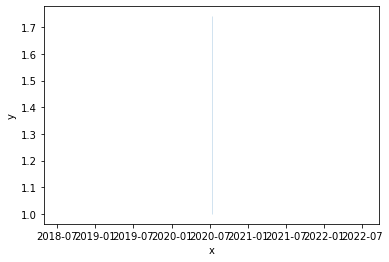

In [88]:
df_FitBit['x'] = df_FitBit['date']['2020-07-11']
df_FitBit['y'] = df_FitBit['stage']

df_FitBit.timestamp = pd.to_datetime(df_FitBit.timestamp, unit='ns')

df_FitBit['date']= df_FitBit['timestamp'].dt.date
df_FitBit['time']= df_FitBit['timestamp'].dt.time
df_FitBit['hour']= df_FitBit['timestamp'].dt.hour
df_FitBit['day'] = df_FitBit['timestamp'].dt.day
df_FitBit['month'] = df_FitBit['timestamp'].dt.month
df_FitBit['year'] = df_FitBit['timestamp'].dt.year

ax = sns.lineplot('x', 'y', data=df_FitBit)
ax.set_xlim(df_FitBit['time']['00:00:00'], df_FitBit['time']['23:59:00'])
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [87]:
type(df_FitBit['time'].min())

datetime.time